# Residual analysis to verify the assumptions of the regression model ::

In [2]:
import pandas as pd

In [4]:
dataframe  = pd.read_excel('/home/ashish/projects/ResidualAnalysis_linearRegression/icecream.xlsx')
dataframe

,Student_Population,Sales
0,2,58
1,6,105
2,8,88
3,8,118
4,12,117
5,16,137
6,20,157
7,20,169
8,22,149
9,26,202


In [22]:
## finding the regression model
from statsmodels.formula.api import ols

reg_model = ols(formula = "Sales~Student_Population ",data=dataframe).fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     74.25
Date:                Wed, 12 Jan 2022   Prob (F-statistic):           2.55e-05
Time:                        19:54:45   Log-Likelihood:                -39.342
No. Observations:                  10   AIC:                             82.68
Df Residuals:                       8   BIC:                             83.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             60.0000      9

/home/ashish/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Regression Equation ::
    sales = 60 + 5*student_population

In [42]:
## Getting the anova table
from statsmodels.stats.anova import anova_lm
print(anova_lm(reg_model))

                     df   sum_sq   mean_sq          F    PR(>F)
Student_Population  1.0  14200.0  14200.00  74.248366  0.000025
Residual            8.0   1530.0    191.25        NaN       NaN


In [38]:
x = dataframe['Student_Population']
y = dataframe['Sales']

## The predicted value of sales(dependent variable) by our Regression Model
y_predicted = reg_model.predict(x)
y_predicted

0     70.0
1     90.0
2    100.0
3    100.0
4    120.0
5    140.0
6    160.0
7    160.0
8    170.0
9    190.0
dtype: float64

In [40]:
residual = y - y_predicted
residual

0   -12.0
1    15.0
2   -12.0
3    18.0
4    -3.0
5    -3.0
6    -3.0
7     9.0
8   -21.0
9    12.0
dtype: float64

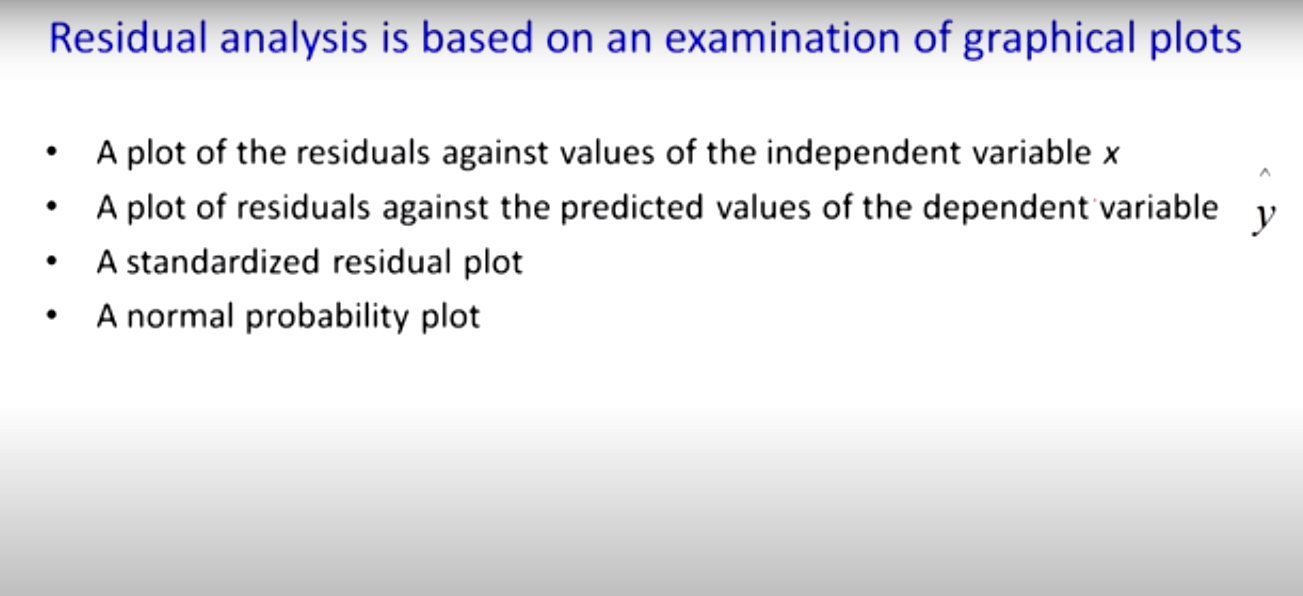

# 1. Residual Plot against independent variable - x::  

Text(0, 0.5, 'Residual')

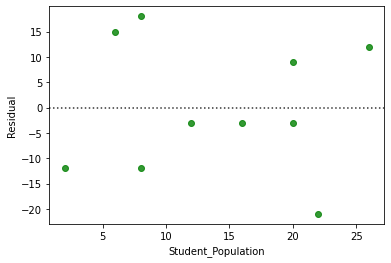

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.residplot(x,residual,color="g")
##plt.xlabel("Student_Population")
plt.ylabel("Residual")

# 2. Residual Plot against dependent variable - y::  

Text(0, 0.5, 'Residual')

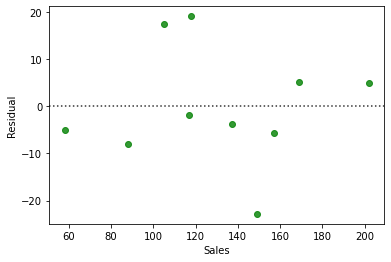

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.residplot(y,residual,color="g")
##plt.xlabel("Student_Population")
plt.ylabel("Residual")

# 3. Standardized/Studentized Residual plot::
     A studentized residual is simply a residual divided by its estimated standard deviation.

In [50]:
influence = reg_model.get_influence()  ## Returns ---> OLSInfluence = The instance containing methods to calculate the main influence and outlier measures for the OLS regression.
resid_student = influence.resid_studentized_external
resid_student

array([-1.09212653,  1.26798654, -0.94196706,  1.54023214, -0.21544891,
       -0.21544891, -0.22263461,  0.68766487, -2.01063738,  1.09212653])

Text(0.5, 1.0, 'STANDARDIZED/STUDENTIZED RESIDUAL')

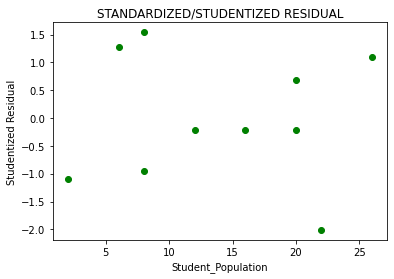

In [53]:
plt.figure()
plt.scatter(x,resid_student,color="green")
plt.xlabel("Student_Population")
plt.ylabel("Studentized Residual")
plt.title("STANDARDIZED/STUDENTIZED RESIDUAL")

## NOTE:: 

    qqplot (Quantile-Quantile Plot) in Python ---> When the quantiles of two variables are plotted against each other, then the plot obtained is known as quantile – quantile plot or qqplot.


# 4. A normal Probability plot of the residuals ::

In [63]:
stats.norm

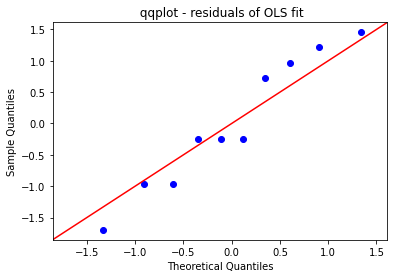

In [68]:
import statsmodels.api as sm
from scipy import stats

res = reg_model.resid  ##for getting the residuals
probplot = sm.ProbPlot(res,stats.norm,fit=True)
fig = probplot.qqplot(line='45')   ##qqplot (Quantile-Quantile Plot)
plt.title(" qqplot - residuals of OLS fit")
plt.show()